<a href="https://colab.research.google.com/github/David-Bustos/Proyects/blob/master/IBM_%26_Coursera_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Coffee shop in Santigo City

### Import basics libreries

In [0]:
import numpy as np
import pandas as pd
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from google.colab import files
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
stgo_coffees = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/df_coffees.csv")
stgo_coffees.head()

id   Coffee Name  ...     Category           Commune
0  579d50ac498e20f50df24db8     Cocó Café  ...         Café        SAN MIGUEL
1  58530b0edebdf67a4d7a812d     Starbucks  ...  Coffee Shop  ESTACIÓN CENTRAL
2  55e7894a498ea1b894714623     Starbucks  ...  Coffee Shop         CERRILLOS
3  513363dbe4b08f70f9cef67d  Caffe Codice  ...  Coffee Shop        SAN MIGUEL
4  4bcb2d58937ca593f4f7a892     Starbucks  ...  Coffee Shop             MAIPÚ

[5 rows x 6 columns]

In [362]:
nearby_venues = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/df_nearby_venues2.csv")
print(nearby_venues.shape)
nearby_venues.head()

(12318, 8)


id Coffee Name  ...  Venue Longitude       Venue Category
0  579d50ac498e20f50df24db8   Cocó Café  ...       -70.654912                 Café
1  579d50ac498e20f50df24db8   Cocó Café  ...       -70.653602     Sushi Restaurant
2  579d50ac498e20f50df24db8   Cocó Café  ...       -70.653820          Coffee Shop
3  579d50ac498e20f50df24db8   Cocó Café  ...       -70.655281  Peruvian Restaurant
4  579d50ac498e20f50df24db8   Cocó Café  ...       -70.653993          Pizza Place

[5 rows x 8 columns]

### Web scraping

In [10]:
url = "https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile"

tables = pd.read_html(url)
tables

[                                                    0  ...                            3
 0   Comunas en la Provincia de Santiago  Cerrillos...  ...                          NaN
 1                 Comunas en la Provincia de Santiago  ...                          NaN
 2                                           Cerrillos  ...                          NaN
 3                                         Cerro Navia  ...                          NaN
 4                                            Conchalí  ...                          NaN
 5                                           El Bosque  ...                          NaN
 6                                    Estación Central  ...                          NaN
 7                                          Huechuraba  ...                          NaN
 8                                       Independencia  ...                          NaN
 9                                         La Cisterna  ...                          NaN
 10                  

In [11]:
#Transform to Dataframe
df_stgo = pd.DataFrame(tables[3])
df_stgo = df_stgo[['Comuna','Población (2017)?']]
df_stgo.columns=(['Commune', 'Population 2017'])

df_stgo

Commune  Population 2017
0             Cerrillos            80832
1           Cerro Navia           132622
2              Conchalí           126955
3             El Bosque           162505
4      Estación Central           147041
5            Huechuraba            98671
6         Independencia           100281
7           La Cisterna            90119
8            La Florida           366916
9             La Granja           116571
10           La Pintana           177335
11             La Reina            92787
12           Las Condes           294838
13         Lo Barnechea           105833
14            Lo Espejo            98804
15             Lo Prado            96249
16                Macul           116534
17                Maipú           521627
18                Ñuñoa           208237
19        Padre Hurtado            63250
20  Pedro Aguirre Cerda           101174
21            Peñalolén           241599
22          Providencia           142079
23             Pudahuel           230293
24          Puente Alto           568106
25            Quilicura           210410
26        Quinta Normal           110026
27             Recoleta           157851
28                Renca           147151
29         San Bernardo           297262
30          San Joaquín            94492
31           San Miguel           107954
32            San Ramón            82900
33             Santiago           404495
34             Vitacura            85384

In [0]:
total_population = df_stgo['Population 2017'].sum(axis = 0, skipna = True)
print('La Población total de las 35 Comunas es de '+ str(total_population) + ' habitantes')

La Población total de las 35 Comunas es de 6179183 habitantes


### Geolocator

#### Alternative 1 - Geopy Nominatim

In [0]:
df_stgo['Latitude']=""
df_stgo['Longitude']=""

for i in range(0,len(df_stgo.index)):
    try:
        
        address = df_stgo.iloc[i,0]+' Comuna, Santiago Chile'
        #print(address)
        geolocator = Nominatim(user_agent="007")
        location = geolocator.geocode(address)
        df_stgo.iloc[i,2] = location.latitude
        df_stgo.iloc[i,3] = location.longitude
        latitude = location.latitude
        longitude = location.longitude
        #print('The geograpical coordinate of Commune are {}, {}.'.format(latitude, longitude))
    
    except AttributeError:
        pass
    
df_stgo

In [20]:
address = 'Santiago Chile'

geolocator = Nominatim(user_agent="007")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Santiago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Santiago are -33.4377968, -70.6504451.


In [0]:
df_stgo.iloc[33,2] = latitude
df_stgo.iloc[33,3] = longitude
df_stgo = df_stgo.astype({"Latitude":'float64', "Longitude":'float64'})

#### Alternative 2 - Geocoder

In [0]:
%%capture
!pip install geocoder

In [309]:
import geocoder
g = geocoder.osm('Santiago Chile') # arcgis / osm 
g.latlng

[-33.4377968, -70.6504451]

In [312]:
df_stgo['Latitude']=""
df_stgo['Longitude']=""

for i in range(0,len(df_stgo.index)):
    try:
        
        address = df_stgo.iloc[i,0]+' Comuna, Santiago Chile'
        #print(address)
        g = geocoder.osm(address)
        df_stgo.iloc[i,2] = g.lat
        df_stgo.iloc[i,3] = g.lng
        #latitude = location.latitude
        #longitude = location.longitude
        #print('The geograpical coordinate of Commune are {}, {}.'.format(latitude, longitude))
    
    except AttributeError:
        pass
    
df_stgo

Commune  Population 2017 Latitude Longitude
0             CERRILLOS            80832  -33.488  -70.7031
1           CERRO NAVIA           132622 -33.4289  -70.7307
2              CONCHALÍ           126955  -33.396  -70.6708
3             EL BOSQUE           162505  -33.556  -70.6657
4      ESTACIÓN CENTRAL           147041 -33.4536  -70.6899
5            HUECHURABA            98671 -33.3745  -70.6363
6         INDEPENDENCIA           100281 -33.4223  -70.6555
7           LA CISTERNA            90119 -33.5346  -70.6644
8            LA FLORIDA           366916 -33.5204  -70.6006
9             LA GRANJA           116571 -33.5431   -70.633
10           LA PINTANA           177335 -33.5833  -70.6298
11             LA REINA            92787 -33.4423  -70.5433
12           LAS CONDES           294838 -33.4085  -70.5671
13         LO BARNECHEA           105833 -33.3616  -70.5052
14            LO ESPEJO            98804 -33.5253  -70.6947
15             LO PRADO            96249 -33.4426  -70.7178
16                MACUL           116534 -33.4822  -70.5992
17                MAIPÚ           521627 -33.5094  -70.7562
18                ÑUÑOA           208237 -33.4543  -70.5936
19        PADRE HURTADO            63250 -33.5673   -70.802
20  PEDRO AGUIRRE CERDA           101174 -33.4938  -70.6761
21            PEÑALOLÉN           241599 -33.4766  -70.5418
22          PROVIDENCIA           142079 -33.4322  -70.6095
23             PUDAHUEL           230293 -33.4368  -70.7518
24          PUENTE ALTO           568106 -33.6095  -70.5755
25            QUILICURA           210410 -33.3678  -70.7315
26        QUINTA NORMAL           110026 -33.4226  -70.6945
27             RECOLETA           157851 -33.4021  -70.6429
28                RENCA           147151 -33.4042   -70.705
29         SAN BERNARDO           297262 -33.5923  -70.7045
30          SAN JOAQUÍN            94492 -33.4966  -70.6291
31           SAN MIGUEL           107954  -33.486  -70.6495
32            SAN RAMÓN            82900 -33.5428  -70.6438
33             SANTIAGO           404495  -34.609  -58.3847
34             VITACURA            85384 -33.3871  -70.5765

In [0]:
g = geocoder.arcgis('Santiago Chile') # arcgis / osm 

df_stgo.iloc[33,2] = g.lat
df_stgo.iloc[33,3] = g.lng
df_stgo = df_stgo.astype({"Latitude":'float64', "Longitude":'float64'})

### Map Communes

In [0]:
map_stgo = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, commune, population in zip(df_stgo['Latitude'], df_stgo['Longitude'], df_stgo['Commune'], df_stgo['Population 2017']):
    label = '{}, {}'.format(commune, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='orange',
        fill=True,
        fill_color='##ff7e1c',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stgo)

        #folium.Marker(
        #[lat, lng],
        #popup=label,
        #icon=folium.Icon(color='brown', icon="home", prefix='fa'),
        #).add_to(map_coffees) 

from folium.plugins import MeasureControl
map_stgo.add_child(MeasureControl())

from folium.plugins import FloatImage
link = ('https://d3njjcbhbojbot.cloudfront.net/api/utilities/v1/imageproxy/https://d15cw65ipctsrr.cloudfront.net/ed/4131809fe511e8937a7926bc59e37f/Professional-Certificate---Data-Science---600x600---Blu-Text.png?auto=format%2Ccompress&dpr=1&w=150&h=150&fit=fill&bg=FFF')
FloatImage(link, bottom=5, left=85).add_to(map_stgo)
    
map_stgo

### Foursquare API - Credentials

In [0]:
CLIENT_ID = 'UGCGU02DLNZBUCSXX02JC32IFROLPBL51X2MCFC3GSDQFB53' # Foursquare ID
CLIENT_SECRET = 'V0VOW0VQFYNHVIHAILUA04CAR0OBWXA33ACIFMQTINLMFME4' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [0]:
CLIENT_ID = 'QGIGC40OIPFLAHA4SZRPLBFFNM1QXA4V2G2LQW5244VYY50P' # your Foursquare ID
CLIENT_SECRET = 'QSE3UMXWQFRONXR4SACUKZJ1HY3HMVYZM1IOT3B1EZXWN0YQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [0]:
CLIENT_ID = 'XNMD2E4XZXZ4BIHWUA24BQ2HMP1A25MFIAT5GXITZIWMA0T4' # Foursquare ID
CLIENT_SECRET = '25KDYDWFLH2WIC0CXUSOAGGGME5A1MKFVC21V0G2USNYUAKJ' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [0]:
CLIENT_ID = 'RF2HLDBFJ0Z0IAOHHOTQG4CMUCDM0RGVAF3DVCQFD153FMOB' # your Foursquare ID
CLIENT_SECRET = '2LYBEQRR5TXMPQWUFKMLWCIKWVOA2G3U3Y1YCYL20MWXKRHJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [0]:
CLIENT_ID = '0HH2B0MRFB2FALD3CL3SQAGF5KPCVO53DS5OEOKOP4MWUCJO'
CLIENT_SECRET = 'D5KMPZK1RAFC0RSUS3VCUOIAIIA2KVCOWHIP1RJX3D1L0UQS'
VERSION = '20180605' # Foursquare API version

### Foursquare API 1

In [0]:
request_parameters = {
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
    "v": '20180605',
    "categoryId": Venues_categories_ID,
    "ll": '-33.4377968,-70.6504451',
    "radius": 100,
    "limit": 100}

results = requests.get("https://api.foursquare.com/v2/venues/explore", params=request_parameters).json()

results

In [0]:
def getCoffeeVenues(names, latitudes, longitudes, section='coffee', radius=5000, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&section={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            section,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['id'], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    coffee_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    coffee_venues.columns = ['Commune', 
                  'Commune Latitude', 
                  'Commune Longitude',
                  'id', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(coffee_venues)

In [0]:
coffee_venues = getCoffeeVenues(names = df_stgo['Commune'], latitudes = df_stgo['Latitude'], longitudes = df_stgo['Longitude'])

In [0]:
print(coffee_venues.shape)
coffee_venues.head()

(1823, 8)


Commune  Commune Latitude  ...  Venue Longitude  Venue Category
0  Cerrillos        -33.487987  ...       -70.675482  Sandwich Place
1  Cerrillos        -33.487987  ...       -70.659940          Bakery
2  Cerrillos        -33.487987  ...       -70.654912            Café
3  Cerrillos        -33.487987  ...       -70.679164     Coffee Shop
4  Cerrillos        -33.487987  ...       -70.716791     Coffee Shop

[5 rows x 8 columns]

### Data Clean & Exproratory Data Analisys - Coffee Venues

In [0]:
stgo_group = coffee_venues.groupby('Commune').count().reset_index()
stgo_group

Commune  Commune Latitude  ...  Venue Longitude  Venue Category
0             Cerrillos                48  ...               48              48
1           Cerro Navia                17  ...               17              17
2              Conchalí                39  ...               39              39
3             El Bosque                11  ...               11              11
4      Estación Central               100  ...              100             100
5            Huechuraba                47  ...               47              47
6         Independencia               100  ...              100             100
7           La Cisterna                13  ...               13              13
8            La Florida                31  ...               31              31
9             La Granja                26  ...               26              26
10           La Pintana                 5  ...                5               5
11             La Reina               100  ...              100             100
12           Las Condes               100  ...              100             100
13         Lo Barnechea                68  ...               68              68
14            Lo Espejo                17  ...               17              17
15             Lo Prado                37  ...               37              37
16                Macul               100  ...              100             100
17                Maipú                25  ...               25              25
18        Padre Hurtado                 7  ...                7               7
19  Pedro Aguirre Cerda                52  ...               52              52
20            Peñalolén                39  ...               39              39
21          Providencia               100  ...              100             100
22             Pudahuel                15  ...               15              15
23          Puente Alto                16  ...               16              16
24            Quilicura                17  ...               17              17
25        Quinta Normal                88  ...               88              88
26             Recoleta               100  ...              100             100
27                Renca                23  ...               23              23
28         San Bernardo                 7  ...                7               7
29          San Joaquín                54  ...               54              54
30           San Miguel               100  ...              100             100
31            San Ramón                21  ...               21              21
32             Santiago               100  ...              100             100
33             Vitacura               100  ...              100             100
34                Ñuñoa               100  ...              100             100

[35 rows x 8 columns]

In [0]:
coffee_venues['Venue Category'].unique()

array(['Sandwich Place', 'Bakery', 'Café', 'Coffee Shop', 'Donut Shop',
       'Breakfast Spot', 'Restaurant', 'Tea Room', 'Fast Food Restaurant',
       'Ice Cream Shop', 'Dessert Shop', 'Snack Place', 'Deli / Bodega',
       'Bookstore', 'French Restaurant',
       'Southern / Soul Food Restaurant', 'Diner', 'Bistro',
       'Salad Place', 'Gas Station', 'Coworking Space', 'Cafeteria',
       'Gastropub', 'Vegetarian / Vegan Restaurant', 'Italian Restaurant',
       'Cupcake Shop', 'Car Wash', 'College Cafeteria', 'Pizza Place',
       'Pie Shop', 'Pub', 'Convenience Store', 'Austrian Restaurant',
       'Gourmet Shop', 'Food'], dtype=object)

In [0]:
coffee_venues['Venue Category'].value_counts()

Coffee Shop                        791
Café                               558
Tea Room                            99
Donut Shop                          83
Bakery                              59
Ice Cream Shop                      47
Restaurant                          31
Breakfast Spot                      27
Snack Place                         18
Deli / Bodega                       14
Bistro                               8
Dessert Shop                         8
Italian Restaurant                   8
Sandwich Place                       7
Cafeteria                            7
Pizza Place                          6
Convenience Store                    6
Gastropub                            6
Vegetarian / Vegan Restaurant        5
French Restaurant                    5
Diner                                5
Pie Shop                             4
Bookstore                            4
College Cafeteria                    3
Pub                                  2
Fast Food Restaurant     

In [0]:
stgo_coffees = coffee_venues[coffee_venues['Venue Category'].isin(['Coffee Shop',
                                                                   'Café',
                                                                   'Tea Room',
                                                                   'Cafeteria',
                                                                   'College Cafeteria' ])].reset_index(drop=True)
stgo_coffees

Commune  Commune Latitude  ...  Venue Longitude Venue Category
0     Cerrillos        -33.487987  ...       -70.654912           Café
1     Cerrillos        -33.487987  ...       -70.679164    Coffee Shop
2     Cerrillos        -33.487987  ...       -70.716791    Coffee Shop
3     Cerrillos        -33.487987  ...       -70.653820    Coffee Shop
4     Cerrillos        -33.487987  ...       -70.750360    Coffee Shop
...         ...               ...  ...              ...            ...
1453   Vitacura        -33.387106  ...       -70.599680           Café
1454   Vitacura        -33.387106  ...       -70.600439    Coffee Shop
1455   Vitacura        -33.387106  ...       -70.530644    Coffee Shop
1456   Vitacura        -33.387106  ...       -70.533415           Café
1457   Vitacura        -33.387106  ...       -70.608852    Coffee Shop

[1458 rows x 8 columns]

In [0]:
stgo_coffees = stgo_coffees[['id', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']]
stgo_coffees[stgo_coffees.duplicated()]

id  ... Venue Category
37    59ea646364c8e16a715a7367  ...    Coffee Shop
38    4dc03c8d043706a032111dd2  ...           Café
39    4eb007cd722e4efd61bab042  ...    Coffee Shop
41    4ef8f45ed3e354f0be70711c  ...    Coffee Shop
42    52001042498eae4be1422c16  ...    Coffee Shop
...                        ...  ...            ...
1452  51f9a7c3498e343d787e209b  ...           Café
1454  518433da498e622f0fb0eb80  ...    Coffee Shop
1455  4e89c7455c5c4e28ce3b09cb  ...    Coffee Shop
1456  525bdf1811d2fce17fb032dc  ...           Café
1457  575428f4498e1f2cea6b83ee  ...    Coffee Shop

[961 rows x 5 columns]

In [0]:
stgo_coffees = stgo_coffees[stgo_coffees.duplicated()==False].reset_index(drop=True)
stgo_coffees = stgo_coffees.rename(columns={"id": "id", 
                                            "Venue": "Coffee Name",
                                            "Venue Latitude": "CN Latitude",
                                            "Venue Longitude": "CN Longitude",
                                            "Venue Category": "Category"})
stgo_coffees

id         Coffee Name  ...  CN Longitude     Category
0    579d50ac498e20f50df24db8           Cocó Café  ...    -70.654912         Café
1    58530b0edebdf67a4d7a812d           Starbucks  ...    -70.679164  Coffee Shop
2    55e7894a498ea1b894714623           Starbucks  ...    -70.716791  Coffee Shop
3    513363dbe4b08f70f9cef67d        Caffe Codice  ...    -70.653820  Coffee Shop
4    4bcb2d58937ca593f4f7a892           Starbucks  ...    -70.750360  Coffee Shop
..                        ...                 ...  ...           ...          ...
492  4bede0cfa40fc928a1ab820c          Fides Café  ...    -70.568491         Café
493  4b61e414f964a52078292ae3  The Coffee Factory  ...    -70.595725         Café
494  4b6ac8b5f964a5202be02be3           Starbucks  ...    -70.599993  Coffee Shop
495  4c39e50e1e06d13a00457a3e          Café Melba  ...    -70.600059         Café
496  4b75dba1f964a520e6292ee3   Confiteria Torres  ...    -70.599680         Café

[497 rows x 5 columns]

In [4]:
stgo_coffees = stgo_coffees.replace(to_replace ="Juan Valdez", value ="Juan Valdez Café") 
stgo_coffees['Coffee Name'].value_counts()

Starbucks           91
Juan Valdez Café    17
Cory                 5
Tavelli              5
Coppelia             4
                    ..
Café del Museo       1
Gelatos Cafe         1
Vichuquén            1
Café Montenegro      1
Café Martina         1
Name: Coffee Name, Length: 361, dtype: int64

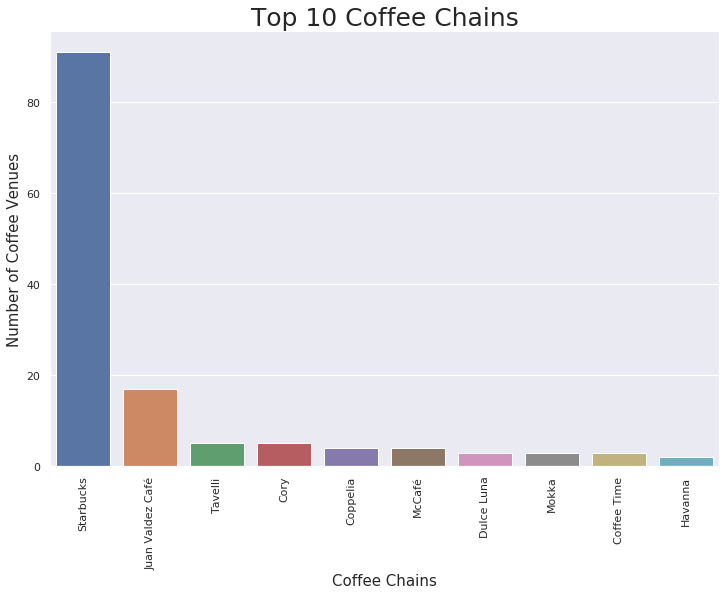

In [435]:
Top10= pd.DataFrame(stgo_coffees['Coffee Name'].value_counts().head(10)).reset_index()
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(Top10['index'], Top10['Coffee Name'])
plt.xlabel('Coffee Chains', fontsize=15)
plt.ylabel('Number of Coffee Venues', fontsize=15)
plt.title('Top 10 Coffee Chains', fontsize=25)
plt.xticks(rotation = 90)
plt.show()

In [0]:
#stgo_coffees['Commune'] = ""
key = 'd3495a60a3e2464f151f9af4ba5fa394e1a18af4'

for i in range(0,len(stgo_coffees)):
  lat = stgo_coffees.iloc[i,2]
  lng = stgo_coffees.iloc[i,3]
  url = 'https://api.desarrolladores.datos.gob.cl/datos-georeferenciados-de-territorio/v1/comunas.json/?auth_key={}&longitud={}&latitud={}'.format(
    key,
    lng,
    lat
  )
  
  try:

    response = requests.get(url)
    stgo_coffees.iloc[i,5] = response.json()['comuna']['nombreComuna']
  
  except KeyError:
    print('Request denegada desde la fila '+ str(i))
    raise
stgo_coffees

id  ...           Commune
0    579d50ac498e20f50df24db8  ...        SAN MIGUEL
1    58530b0edebdf67a4d7a812d  ...  ESTACIÓN CENTRAL
2    55e7894a498ea1b894714623  ...         CERRILLOS
3    513363dbe4b08f70f9cef67d  ...        SAN MIGUEL
4    4bcb2d58937ca593f4f7a892  ...             MAIPÚ
..                        ...  ...               ...
492  4bede0cfa40fc928a1ab820c  ...          VITACURA
493  4b61e414f964a52078292ae3  ...        LAS CONDES
494  4b6ac8b5f964a5202be02be3  ...        LAS CONDES
495  4c39e50e1e06d13a00457a3e  ...        LAS CONDES
496  4b75dba1f964a520e6292ee3  ...        LAS CONDES

[497 rows x 6 columns]

In [6]:
stgo_coffees['Commune'].value_counts()

LAS CONDES          104
SANTIAGO             89
PROVIDENCIA          63
ÑUÑOA                44
VITACURA             38
MAIPÚ                17
ESTACIÓN CENTRAL     15
HUECHURABA           14
LA FLORIDA           13
PEÑALOLÉN            12
LO BARNECHEA         12
LA REINA              9
PUENTE ALTO           9
RECOLETA              7
SAN BERNARDO          5
RENCA                 5
QUILICURA             5
MACUL                 4
LA CISTERNA           4
CERRILLOS             4
SAN MIGUEL            4
PIRQUE                3
SAN RAMÓN             3
PUDAHUEL              2
INDEPENDENCIA         2
SAN JOAQUÍN           2
QUINTA NORMAL         2
CALERA DE TANGO       2
LO PRADO              1
CERRO NAVIA           1
EL BOSQUE             1
LO ESPEJO             1
Name: Commune, dtype: int64

In [18]:
stgo_coffees.drop(stgo_coffees[stgo_coffees['Commune'].isin(['CALERA DE TANGO', 'PIRQUE'])].index, inplace = True)
stgo_coffees = stgo_coffees.reset_index(drop=True)
print('There are '+ str(stgo_coffees['Commune'].nunique()) +' Communes with Coffee Venues')

There are 30 Communes with Coffee Venues


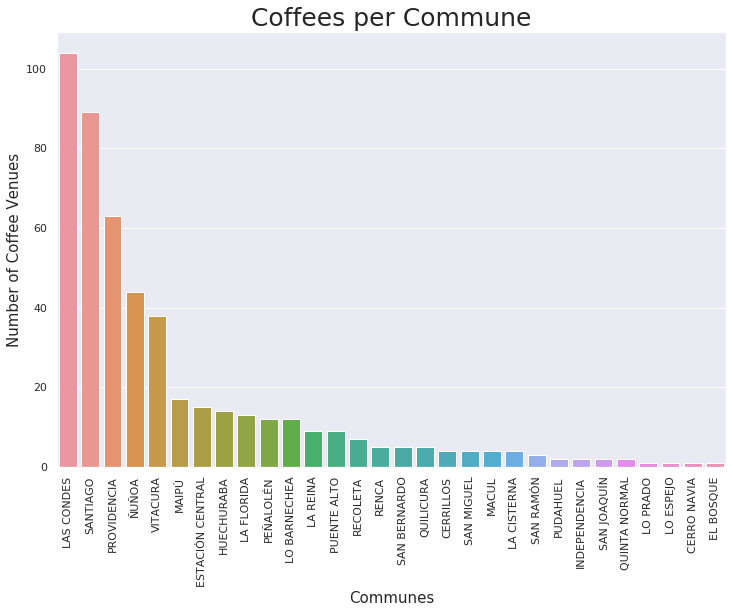

In [8]:
cp_commune= pd.DataFrame(stgo_coffees['Commune'].value_counts()).reset_index()
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(cp_commune['index'], cp_commune['Commune'])
plt.xlabel('Communes', fontsize=15)
plt.ylabel('Number of Coffee Venues', fontsize=15)
plt.title('Coffees per Commune', fontsize=25)
plt.xticks(rotation = 90)
plt.show()

In [12]:
#coffee venue per capita
sc = stgo_coffees['Commune'].value_counts()
sc = pd.DataFrame(sc).reset_index()
df_stgo['Commune'] = df_stgo['Commune'].str.upper()
sc = sc.join(df_stgo.set_index('Commune'), on='index')
sc = sc.rename(columns= {"index": "Commune", 
                   "Commune": "Coffee Venues",
                   "Population 2017": "Population"})
sc['Coffee per Capita'] = sc['Population']/sc['Coffee Venues']
sc = sc.round(2)
sc

Commune  Coffee Venues  Population  Coffee per Capita
0         LAS CONDES            104      294838            2834.98
1           SANTIAGO             89      404495            4544.89
2        PROVIDENCIA             63      142079            2255.22
3              ÑUÑOA             44      208237            4732.66
4           VITACURA             38       85384            2246.95
5              MAIPÚ             17      521627           30683.94
6   ESTACIÓN CENTRAL             15      147041            9802.73
7         HUECHURABA             14       98671            7047.93
8         LA FLORIDA             13      366916           28224.31
9          PEÑALOLÉN             12      241599           20133.25
10      LO BARNECHEA             12      105833            8819.42
11          LA REINA              9       92787           10309.67
12       PUENTE ALTO              9      568106           63122.89
13          RECOLETA              7      157851           22550.14
14             RENCA              5      147151           29430.20
15      SAN BERNARDO              5      297262           59452.40
16         QUILICURA              5      210410           42082.00
17         CERRILLOS              4       80832           20208.00
18        SAN MIGUEL              4      107954           26988.50
19             MACUL              4      116534           29133.50
20       LA CISTERNA              4       90119           22529.75
21         SAN RAMÓN              3       82900           27633.33
22          PUDAHUEL              2      230293          115146.50
23     INDEPENDENCIA              2      100281           50140.50
24       SAN JOAQUÍN              2       94492           47246.00
25     QUINTA NORMAL              2      110026           55013.00
26          LO PRADO              1       96249           96249.00
27         LO ESPEJO              1       98804           98804.00
28       CERRO NAVIA              1      132622          132622.00
29         EL BOSQUE              1      162505          162505.00

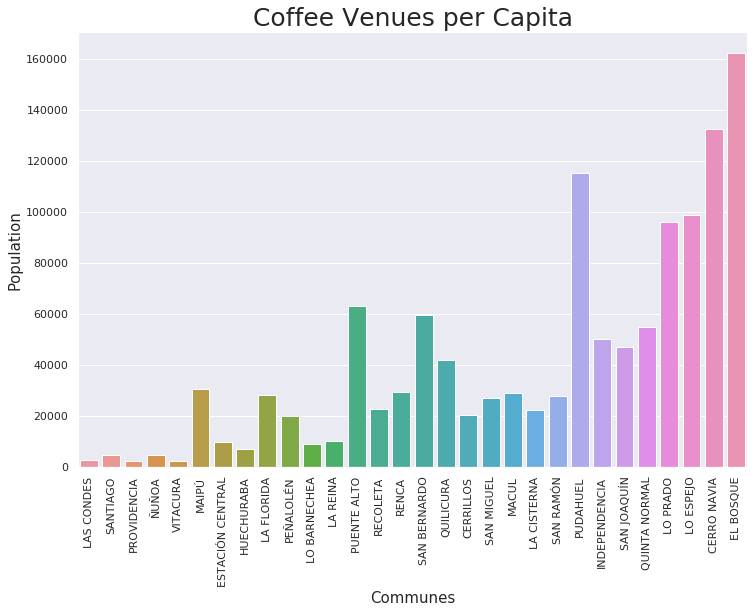

In [13]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(sc['Commune'], sc['Coffee per Capita'])
plt.xlabel('Communes', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Coffee Venues per Capita', fontsize=25)
plt.xticks(rotation = 90)
plt.show()

In [0]:
#stgo_coffees.to_csv('df_coffees_final.csv', index = None) 
#files.download('df_coffees_final.csv')

In [0]:
map_coffees = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, coffee, commune in zip(stgo_coffees['CN Latitude'], stgo_coffees['CN Longitude'], stgo_coffees['Coffee Name'], stgo_coffees['Commune']):
    label = '{}, {}'.format(coffee, commune)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#ffc505',
        fill_opacity=0.7,
        parse_html=False).add_to(map_coffees)  
    
map_coffees

In [0]:
from folium import plugins
from folium.plugins import HeatMap

map_coffees_2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# convert to (n, 2) nd-array format for heatmap
CoffeesArr = stgo_coffees[['CN Latitude', 'CN Longitude']].as_matrix()

# plot heatmap
map_coffees_2.add_children(plugins.HeatMap(CoffeesArr, radius=15))
 
    
map_coffees_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  # Remove the CWD from sys.path while we load stuff.


### Foursquare API 2

In [0]:
Recreation = '4d4b7105d754a06377d81259'
Cultural = '4d4b7104d754a06370d81259'
Universities = '4d4b7105d754a06372d81259'
Professionals = '4d4b7105d754a06375d81259'
Services_store = '4d4b7105d754a06378d81259'
Transport = '4d4b7105d754a06379d81259'

Venues_categories_ID = 

In [0]:
def getNearbyVenues(ID, names, latitudes, longitudes, radius=300, LIMIT = 100):

    venues_list=[]
    
    for ID, name, lat, lng in zip(ID, names, latitudes, longitudes):

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
          
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            ID,
            name, 
            lat, 
            lng,
            v['venue']['id'], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

      


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['id', 
                  'Coffee Name', 
                  'CN Latitude', 
                  'CN Longitude',
                  'id Venue', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
nearby_venues = getNearbyVenues(ID = stgo_coffees['id'], 
                                names = stgo_coffees['Coffee Name'],
                                latitudes = stgo_coffees['CN Latitude'], 
                                longitudes = stgo_coffees['CN Longitude'])

In [398]:
print(nearby_venues.shape)
nearby_venues.head()

(12285, 9)


id Coffee Name  ...  Venue Longitude       Venue Category
0  579d50ac498e20f50df24db8   Cocó Café  ...       -70.654912                 Café
1  579d50ac498e20f50df24db8   Cocó Café  ...       -70.653602     Sushi Restaurant
2  579d50ac498e20f50df24db8   Cocó Café  ...       -70.653820          Coffee Shop
3  579d50ac498e20f50df24db8   Cocó Café  ...       -70.655281  Peruvian Restaurant
4  579d50ac498e20f50df24db8   Cocó Café  ...       -70.653993          Pizza Place

[5 rows x 9 columns]

In [399]:
nearby_venues['id'].value_counts()

5a465668e185f31fd1d34fe7    87
4fd8f3a1e4b0b01132012d3c    82
51b3d985498e967c1b6d364f    81
51ea951c498edfd8d8286551    80
566e3c4e498e58ba3b7a1f5b    77
                            ..
4e024ecd88776240d3f7c182     2
5213b32911d22ed87734f645     2
4e5d19d01f6e330fd1b18986     1
4e5235f2d1643fe916379790     1
4e382e7ab61c5cb3c387f094     1
Name: id, Length: 491, dtype: int64

In [0]:
nearby_venues.to_csv('df_nearby_venues3.csv', index = None) 
files.download('df_nearby_venues3.csv')

In [400]:
filter = nearby_venues['Venue Category'].isin(['Coffee Shop', 'Café', 'Tea Room', 'Cafeteria', 'College Cafeteria' ])
other_venues = nearby_venues[filter==False].reset_index(drop=True)
print(other_venues.shape)
other_venues['id'].value_counts()

(10763, 9)


5a465668e185f31fd1d34fe7    80
4fd8f3a1e4b0b01132012d3c    76
51b3d985498e967c1b6d364f    75
51ea951c498edfd8d8286551    74
56911658498ed86bf61280ec    69
                            ..
4e29eab152b1b8f19850bcd4     1
4cdacf9efc973704bee5ca05     1
4e024ecd88776240d3f7c182     1
4e4eabb2d164978659bf21f3     1
514b337ce4b0d7d598f57667     1
Name: id, Length: 485, dtype: int64

In [401]:
filter2 = other_venues['Venue Category'].str.contains(pat='Restaurant|Burger|Sandwich|Ice|Breakfast|Bakery|Snack|Pizza|Hot Dog|Chicken|Food|Donut')
other_venues = other_venues[filter2==False].reset_index(drop=True)
print(other_venues.shape)
other_venues['id'].value_counts()

(6012, 9)


51ea951c498edfd8d8286551    55
56911658498ed86bf61280ec    52
5a465668e185f31fd1d34fe7    52
598f7588c4df1d322fd1c77b    51
51b3d985498e967c1b6d364f    50
                            ..
4f249861e4b0a93fbf1f5972     1
56eae5f8cd10fb42d930b97d     1
4c564ce22308be9ad2c4566c     1
4e199e0a45dd120c1219cf6b     1
4e29eab152b1b8f19850bcd4     1
Name: id, Length: 478, dtype: int64

In [402]:
NV_group = other_venues.groupby('id').count()
NV_group

Coffee Name  ...  Venue Category
id                                     ...                
4b44cd2df964a52092fc25e3           39  ...              39
4b50d1f9f964a520a13327e3           31  ...              31
4b52156bf964a5208e6627e3           11  ...              11
4b548636f964a5208abe27e3           21  ...              21
4b55ac55f964a52051eb27e3           29  ...              29
...                               ...  ...             ...
5b6081e01c0b34002e2f147b           14  ...              14
5b69e42e628c83002c1d59ae            8  ...               8
5b70bb8d419a9e0039debe29           13  ...              13
5ccb87e7065ef5002cf7e34e            8  ...               8
5cf05372d552c7002ccabfc0            4  ...               4

[478 rows x 8 columns]

There are 236 uniques categories.


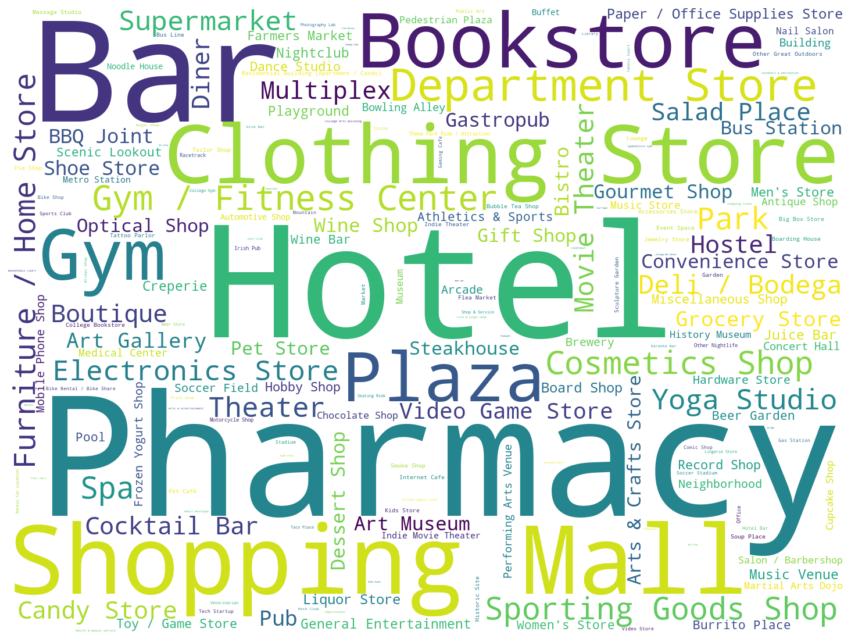

In [403]:
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5, background_color="white").generate_from_frequencies(other_venues['Venue Category'].value_counts()))

print('There are {} uniques categories.'.format(len(other_venues['Venue Category'].unique())))

fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Preprocessing for Clustering

In [174]:
# one hot encoding
onehot = pd.get_dummies(other_venues[['Venue Category']], prefix="", prefix_sep="")

# add id column back to dataframe
onehot['id'] = other_venues['id']

print(onehot.shape)
onehot.head()

(6002, 242)


Accessories Store  Adult Boutique  ...  Zoo Exhibit                        id
0                  0               0  ...            0  579d50ac498e20f50df24db8
1                  0               0  ...            0  579d50ac498e20f50df24db8
2                  0               0  ...            0  579d50ac498e20f50df24db8
3                  0               0  ...            0  579d50ac498e20f50df24db8
4                  0               0  ...            0  58530b0edebdf67a4d7a812d

[5 rows x 242 columns]

In [304]:
grouped = onehot.groupby('id').sum().reset_index()
grouped

id  Accessories Store  ...  Yoga Studio  Zoo Exhibit
0    4b44cd2df964a52092fc25e3                  0  ...            0            0
1    4b50d1f9f964a520a13327e3                  0  ...            0            0
2    4b52156bf964a5208e6627e3                  0  ...            0            0
3    4b548636f964a5208abe27e3                  0  ...            1            0
4    4b55ac55f964a52051eb27e3                  0  ...            2            0
..                        ...                ...  ...          ...          ...
476  5b6081e01c0b34002e2f147b                  0  ...            0            0
477  5b69e42e628c83002c1d59ae                  0  ...            0            0
478  5b70bb8d419a9e0039debe29                  0  ...            0            0
479  5ccb87e7065ef5002cf7e34e                  0  ...            0            0
480  5cf05372d552c7002ccabfc0                  0  ...            0            0

[481 rows x 242 columns]

In [222]:
from sklearn import preprocessing
#Feature = pd.merge(grouped, stgo_coffees, on='id', how='inner')
#Feature = pd.merge(Feature, sc, on='Commune', how='inner')
#Feature = Feature.drop({'id','Coffee Name', 'CN Latitude', 'CN Longitude', 'Category', 'Commune', 'Coffee Venues', 'Population'}, axis=1)
grouped_clustering = grouped.drop('id', 1)
Feature = preprocessing.StandardScaler().fit(grouped_clustering).transform(grouped_clustering)
Feature

array([[-0.16357923, -0.08152805, -0.09154773, ..., -0.14984992,
        -0.34398586, -0.0643506 ],
       [-0.16357923, -0.08152805, -0.09154773, ..., -0.14984992,
        -0.34398586, -0.0643506 ],
       [-0.16357923, -0.08152805, -0.09154773, ..., -0.14984992,
        -0.34398586, -0.0643506 ],
       ...,
       [-0.16357923, -0.08152805, -0.09154773, ..., -0.14984992,
        -0.34398586, -0.0643506 ],
       [-0.16357923, -0.08152805, -0.09154773, ..., -0.14984992,
        -0.34398586, -0.0643506 ],
       [-0.16357923, -0.08152805, -0.09154773, ..., -0.14984992,
        -0.34398586, -0.0643506 ]])

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [234]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['id']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
other_venues_sorted = pd.DataFrame(columns=columns)
other_venues_sorted['id'] = grouped['id']

for ind in np.arange(grouped.shape[0]):
    other_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

other_venues_sorted.head()

id  ... 10th Most Common Venue
0  4b44cd2df964a52092fc25e3  ...             Hobby Shop
1  4b50d1f9f964a520a13327e3  ...     Frozen Yogurt Shop
2  4b52156bf964a5208e6627e3  ...             Art Museum
3  4b548636f964a5208abe27e3  ...         Boarding House
4  4b55ac55f964a52051eb27e3  ...              Nightclub

[5 rows x 11 columns]

### Optimal K in K-Means Alghoritm

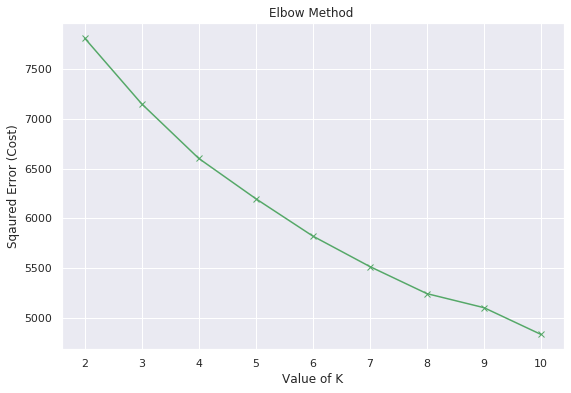

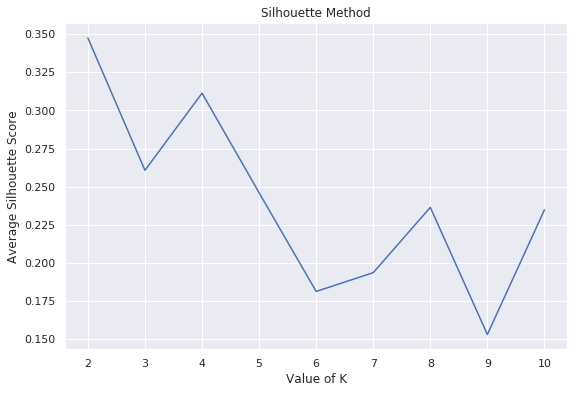

In [230]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

grouped_clustering = grouped.drop('id', 1)
#grouped_clustering = Feature

cost = []
silhouette = []
Ks = range(2, 11)
for i in Ks:

  # run k-means clustering
  kmeans = KMeans(n_clusters=i, random_state=2).fit(grouped_clustering)


  # calculates squared error for the clustered points
  cost.append(kmeans.inertia_)

  silhouette.append(silhouette_score(grouped_clustering, kmeans.labels_ ,metric='euclidean'))

# plot the cost against K values
plt.figure(figsize=(9,6))
plt.plot(Ks, cost, 'bx-', color ='g') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)")
plt.title("Elbow Method ") 
plt.show()
print('')
plt.figure(figsize=(9,6))
plt.plot(Ks, silhouette)
plt.xlabel("Value of K") 
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Method")
plt.show()

In [0]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(grouped_clustering)
distances, indices = nbrs.kneighbors(grouped_clustering)


In [0]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [0]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps = 0.4, min_samples = 2).fit(grouped_clustering) 
labels = dbscan_model.labels_

# check cluster labels generated for each row in the dataframe
print(set(labels))
labels

In [0]:
kclusters = 4
kmeans = KMeans(n_clusters=kclusters).fit(grouped_clustering)

In [236]:
# add clustering labels
other_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = stgo_coffees

# merge toronto_grouped with toronto_data to add latitude/longitude for each id
df_merged = df_merged.join(other_venues_sorted.set_index('id'), on='id')

df_merged = df_merged.drop('Commune', axis=1)
df_merged = df_merged.dropna()
df_merged = df_merged.astype({"Cluster Labels":'int64'})

print(df_merged['Cluster Labels'].value_counts())
df_merged.head() # check the last columns!

1    343
0     64
3     58
2     16
Name: Cluster Labels, dtype: int64


id  ... 10th Most Common Venue
0  579d50ac498e20f50df24db8  ...         Farmers Market
1  58530b0edebdf67a4d7a812d  ...            Salad Place
2  55e7894a498ea1b894714623  ...      Mobile Phone Shop
3  513363dbe4b08f70f9cef67d  ...      Fish & Chips Shop
4  4bcb2d58937ca593f4f7a892  ...          Burrito Place

[5 rows x 16 columns]

### Coffee Clusters

In [237]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['CN Latitude'], df_merged['CN Longitude'], df_merged['Coffee Name'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 0

In [238]:
cluster0 = df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]
cluster0

Coffee Name  ...  10th Most Common Venue
1           Starbucks  ...             Salad Place
2           Starbucks  ...       Mobile Phone Shop
4           Starbucks  ...           Burrito Place
5    Juan Valdez Café  ...      Miscellaneous Shop
6           Pannacota  ...      Miscellaneous Shop
..                ...  ...                     ...
462       Xurros Café  ...                Bus Line
471              Cory  ...           Jewelry Store
473          Coppelia  ...            Soccer Field
478            Casino  ...       Electronics Store
487        Fides Café  ...            Dessert Shop

[64 rows x 12 columns]

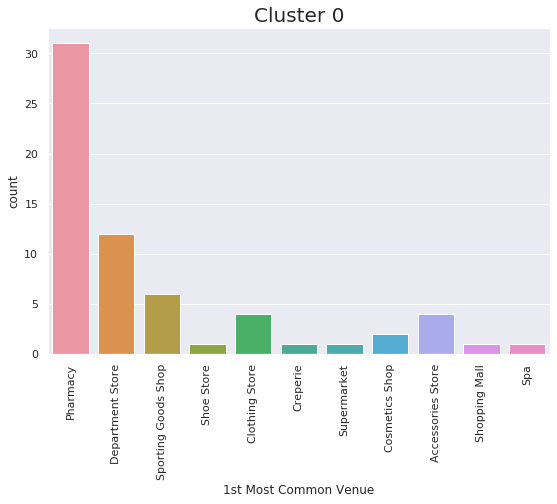

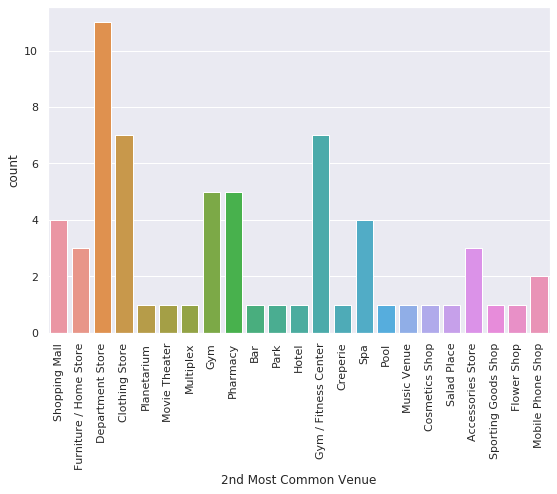

In [295]:
plt.figure(figsize=(9,6))
sns.countplot(cluster0['1st Most Common Venue'])
plt.xticks(rotation = 90)
plt.title('Cluster 0', size=20)
plt.show()

plt.figure(figsize=(9,6))
second=sns.countplot(cluster0['2nd Most Common Venue'])
plt.xticks(rotation = 90)
plt.show()

Cluster 1

In [239]:
cluster1 = df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]
cluster1

Coffee Name  ...  10th Most Common Venue
0                           Cocó Café  ...          Farmers Market
3                        Caffe Codice  ...       Fish & Chips Shop
12   Cafeteria Bicentenario by Sodexo  ...             Fabric Shop
13                        Coffeebreak  ...          Farmers Market
14                      Coffee Market  ...       Fish & Chips Shop
..                                ...  ...                     ...
482                      Café Helarte  ...       Fish & Chips Shop
483                       Café Cariño  ...    Gym / Fitness Center
484                   Café Villa Real  ...             Event Space
485                         Starbucks  ...            Dessert Shop
486                       Kaffeestube  ...                Dive Bar

[343 rows x 12 columns]

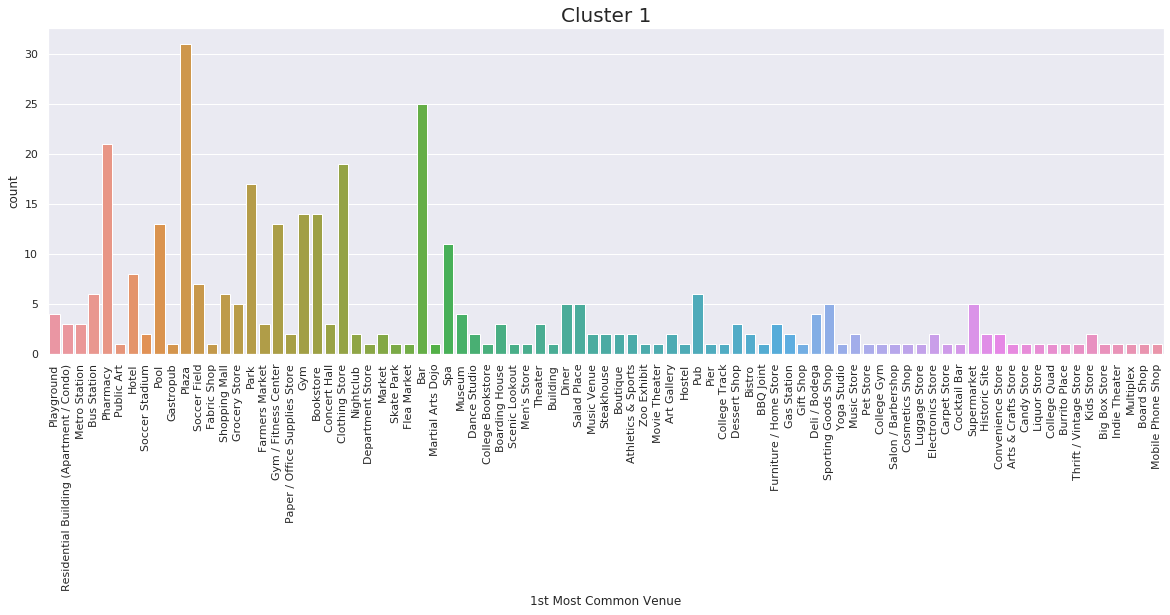

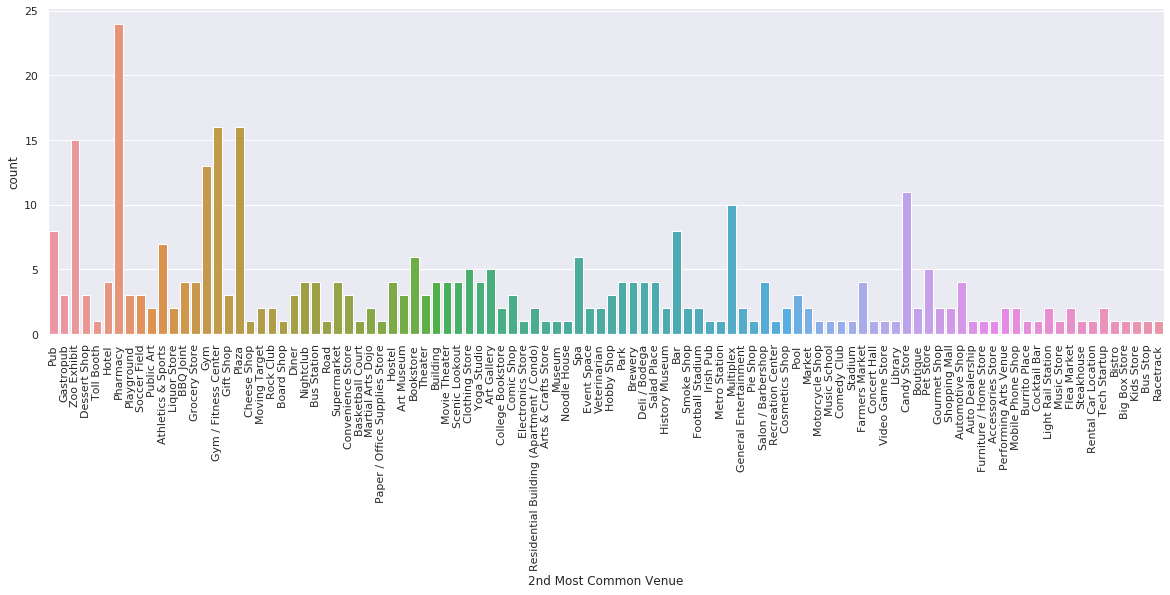

In [297]:
plt.figure(figsize=(20,6))
sns.countplot(cluster1['1st Most Common Venue'])
plt.xticks(rotation = 90)
plt.title('Cluster 1', size=20)
plt.show()

plt.figure(figsize=(20,6))
second=sns.countplot(cluster1['2nd Most Common Venue'])
plt.xticks(rotation = 90)
plt.show()

Cluster 2

In [240]:
cluster2 = df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]
cluster2

Coffee Name  ...  10th Most Common Venue
182             Cacao Much  ...           Shopping Mall
192       Juan Valdez Café  ...  Furniture / Home Store
193              Starbucks  ...              Board Shop
195                   Cory  ...              Board Shop
196                 McCafé  ...            Soccer Field
202            Adagio Teas  ...            Soccer Field
203               Big John  ...                Pharmacy
211      Cafetería Duoc UC  ...               Gastropub
293  Inside Tea Connection  ...                     Spa
295              Starbucks  ...               Multiplex
296              Starbucks  ...                     Spa
297               Whittard  ...     Sporting Goods Shop
301              Starbucks  ...        Department Store
329              Starbucks  ...     Sporting Goods Shop
452              Starbucks  ...     Sporting Goods Shop
456        Bigi Coffee Bar  ...               Bookstore

[16 rows x 12 columns]

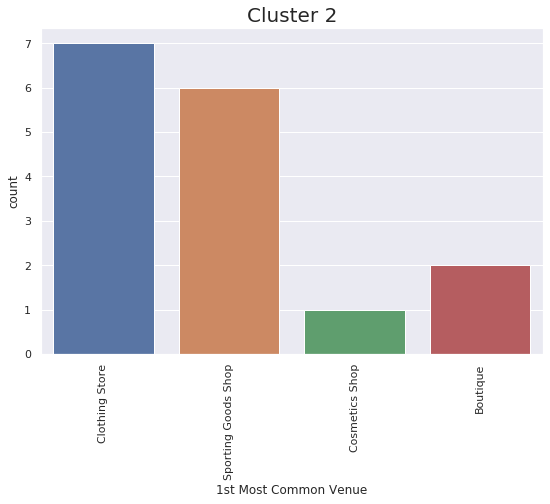

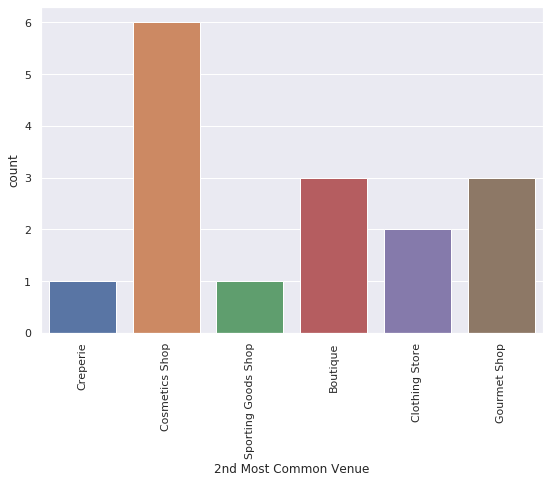

In [299]:
plt.figure(figsize=(9,6))
sns.countplot(cluster2['1st Most Common Venue'])
plt.xticks(rotation = 90)
plt.title('Cluster 2', size=20)
plt.show()

plt.figure(figsize=(9,6))
second=sns.countplot(cluster2['2nd Most Common Venue'])
plt.xticks(rotation = 90)
plt.show()

Cluster 3

In [241]:
cluster3 = df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]
cluster3

Coffee Name  ...  10th Most Common Venue
44                          Sur Café  ...                   Diner
83                         Starbucks  ...               Nightclub
92              Café Crónica Digital  ...                   Hotel
95                        Milagritos  ...      Miscellaneous Shop
96            Bloom Specialty Coffee  ...                    Park
98                   Wonderland Café  ...                    Park
100                        Starbucks  ...      Miscellaneous Shop
101                          Colmado  ...            Neighborhood
106                       Milagritos  ...               Nightclub
107                        Dómestico  ...          Scenic Lookout
108                   Café del Ópera  ...               Nightclub
110             3841 Coffee Roasters  ...                     Spa
112                   Café del Museo  ...                     Spa
113                    Café Forestal  ...                     Spa
116          Café Bistro de la Barra  ...               Nightclub
120                     Café Público  ...                  Hostel
121                    Café Mosqueto  ...               Nightclub
122                        Starbucks  ...               Nightclub
127                     Café Melinka  ...             Tailor Shop
128                    Café da Lucia  ...               Nightclub
130                        Starbucks  ...               Nightclub
136                Café de las Artes  ...      Miscellaneous Shop
138               Cañamo Coffee Shop  ...               Nightclub
143                        Starbucks  ...               Gastropub
160                         Café Noi  ...              Steakhouse
161                         Café 202  ...             Beer Garden
162                        PortaCafé  ...   General Entertainment
163                        Starbucks  ...                 Theater
164                    Café Triciclo  ...             Other Event
167         Big Boba Bubble Tea Shop  ...             Karaoke Bar
170                        Starbucks  ...               Nightclub
172                   Tea Connection  ...               Gift Shop
173                        Starbucks  ...                  Hostel
174  El Taller Club De Helado Y Café  ...          Soccer Stadium
175      Brussels Heart Of Chocolate  ...             Men's Store
176                       Rich Cofee  ...       Electronics Store
177                       La Tetería  ...             Men's Store
184                    Faustina Café  ...              Soup Place
267                     Café Martina  ...             Event Space
310                             milk  ...       Electronics Store
312                       Tasty Beat  ...        Sculpture Garden
314                 Juan Valdez Café  ...       Electronics Store
319                          cafetín  ...                Building
321                       Beppo Café  ...             Zoo Exhibit
323                        Starbucks  ...       Electronics Store
330                        Starbucks  ...            Dessert Shop
331                        Starbucks  ...            Dance Studio
418         ArteSano Café & Boutique  ...                     Pub
432                        Starbucks  ...              Hobby Shop
433                        Starbucks  ...      Frozen Yogurt Shop
436                 Juan Valdez Café  ...               Gift Shop
453               Club Colombia Cafe  ...                     Spa
454                      Cafe Bagdad  ...            Gourmet Shop
455                        Starbucks  ...                     Pub
488               The Coffee Factory  ...        Sculpture Garden
489                        Starbucks  ...                Building
490                       Café Melba  ...          Chocolate Shop
491                Confiteria Torres  ...                Building

[58 rows x 12 columns]

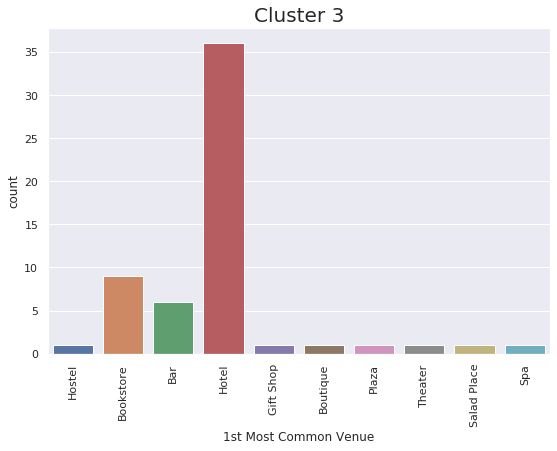

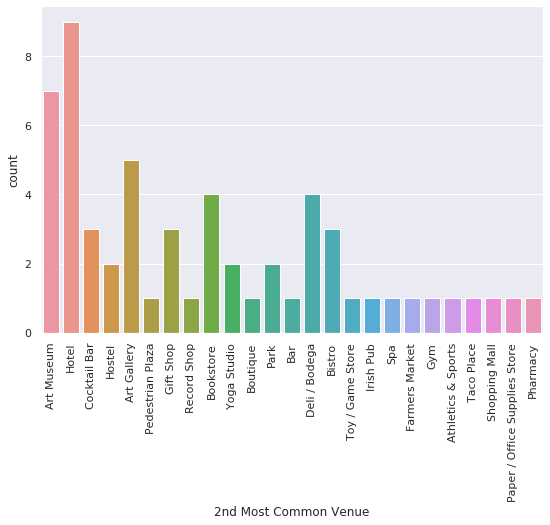

In [302]:
plt.figure(figsize=(9,6))
sns.countplot(cluster3['1st Most Common Venue'])
plt.xticks(rotation = 90)
plt.title('Cluster 3', size=20)
plt.show()

plt.figure(figsize=(9,6))
second=sns.countplot(cluster3['2nd Most Common Venue'])
plt.xticks(rotation = 90)
plt.show()

### Similar places without coffee stores
### Potential Venues for new Coffee stores

In [0]:
def getSimilarVenues(names, latitudes, longitudes, radius=5000, LIMIT = 100):
    
    pharmacy = '4bf58dd8d48988d10f951735'
    plaza = '4bf58dd8d48988d164941735'
    park = '4bf58dd8d48988d163941735'
    hotel = '4bf58dd8d48988d1fa931735'
    clothing_store = '4bf58dd8d48988d103951735'
    bookstore = '4bf58dd8d48988d114951735'
    departament_store = '4bf58dd8d48988d1f6941735'
    art_museum = '4bf58dd8d48988d18f941735'
    art_gallery = '4bf58dd8d48988d1e2931735'
    bar = '4bf58dd8d48988d116941735'

    categories = pharmacy + ',' + plaza + ',' + park + ',' + hotel + ',' + clothing_store + ',' + bookstore + ',' + departament_store + ',' + art_museum + ',' + art_gallery + ',' + bar

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            categories,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['id'], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    similar_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    similar_venues.columns = ['Commune', 
                  'Commune Latitude', 
                  'Commune Longitude',
                  'id', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(similar_venues)

In [0]:
similar_venues = getSimilarVenues(names = df_stgo['Commune'], latitudes = df_stgo['Latitude'], longitudes = df_stgo['Longitude'])

In [383]:
print(similar_venues.shape)
similar_venues.head()

(2664, 8)


Commune  Commune Latitude  ...  Venue Longitude    Venue Category
0  CERRILLOS        -33.487987  ...       -70.699234              Park
1  CERRILLOS        -33.487987  ...       -70.704201       Art Gallery
2  CERRILLOS        -33.487987  ...       -70.684434    Farmers Market
3  CERRILLOS        -33.487987  ...       -70.665522              Park
4  CERRILLOS        -33.487987  ...       -70.718194  Department Store

[5 rows x 8 columns]

In [384]:
similar_venues['Venue Category'].value_counts().head(50)

Plaza                            502
Park                             447
Pharmacy                         330
Bar                              256
Department Store                 255
Hotel                            225
Clothing Store                   117
Shoe Store                        35
Bookstore                         35
Supermarket                       31
Art Museum                        31
Shopping Mall                     30
Hardware Store                    30
Art Gallery                       30
Pub                               28
Playground                        19
Women's Store                     14
Furniture / Home Store            13
Nightclub                         11
Boutique                          11
Kids Store                        10
Water Park                         9
Garden                             9
Sporting Goods Shop                8
Paper / Office Supplies Store      8
Motel                              8
Other Great Outdoors               8
B

In [0]:
similar_venues.to_csv('df_similar_venues.csv', index = None) 
files.download('df_similar_venues.csv')

In [412]:
similar_group = similar_venues.groupby('Commune').count().reset_index()
similar_group

Commune  Commune Latitude  ...  Venue Longitude  Venue Category
0             CERRILLOS                76  ...               76              76
1           CERRO NAVIA                44  ...               44              44
2              CONCHALÍ                59  ...               59              59
3             EL BOSQUE                29  ...               29              29
4      ESTACIÓN CENTRAL               100  ...              100             100
5            HUECHURABA                81  ...               81              81
6         INDEPENDENCIA               100  ...              100             100
7           LA CISTERNA                42  ...               42              42
8            LA FLORIDA                87  ...               87              87
9             LA GRANJA                84  ...               84              84
10           LA PINTANA                30  ...               30              30
11             LA REINA               100  ...              100             100
12           LAS CONDES               100  ...              100             100
13         LO BARNECHEA               100  ...              100             100
14            LO ESPEJO                61  ...               61              61
15             LO PRADO                69  ...               69              69
16                MACUL               100  ...              100             100
17                MAIPÚ                69  ...               69              69
18        PADRE HURTADO                28  ...               28              28
19  PEDRO AGUIRRE CERDA                80  ...               80              80
20            PEÑALOLÉN                70  ...               70              70
21          PROVIDENCIA               100  ...              100             100
22             PUDAHUEL                50  ...               50              50
23          PUENTE ALTO                60  ...               60              60
24            QUILICURA                71  ...               71              71
25        QUINTA NORMAL               100  ...              100             100
26             RECOLETA               100  ...              100             100
27                RENCA                62  ...               62              62
28         SAN BERNARDO                49  ...               49              49
29          SAN JOAQUÍN               100  ...              100             100
30           SAN MIGUEL                93  ...               93              93
31            SAN RAMÓN                70  ...               70              70
32             SANTIAGO               100  ...              100             100
33             VITACURA               100  ...              100             100
34                ÑUÑOA               100  ...              100             100

[35 rows x 8 columns]

In [387]:
cat = similar_venues['Venue Category'].isin(['Plaza',
                                       'Park',
                                       'Pharmacy',
                                       'Hotel',
                                       'Bar',
                                       'Clothing Store',
                                       'Department Store',
                                       'Art Museum',
                                       'Art Gallery',
                                       'Bookstore']).reset_index(drop=True)

similar_venues_cat = similar_venues[cat]
similar_venues_cat = similar_venues_cat[['id', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']]
similar_venues_cat = similar_venues_cat[similar_venues_cat.duplicated()==False].reset_index(drop=True) 
similar_venues_cat                                                                                      

id  ...    Venue Category
0    4ea31634f5b9efc001b7047d  ...              Park
1    577bca5b498e3c4f7d0b9928  ...       Art Gallery
2    4c952d7772dd224be74ea191  ...              Park
3    50c72c06e4b049f73733e0b3  ...  Department Store
4    4f8f5204e4b040e3a767e54f  ...       Art Gallery
..                        ...  ...               ...
903  4c982521d799a1cd2938b052  ...          Pharmacy
904  4e88e7192c5bdb385ac669b7  ...              Park
905  4eb3262af790168640bea137  ...          Pharmacy
906  4b634f27f964a5203d712ae3  ...  Department Store
907  4c6e952b10faa143c10ef168  ...          Pharmacy

[908 rows x 5 columns]

In [407]:
cat = other_venues['Venue Category'].isin(['Plaza',
                                       'Park',
                                       'Pharmacy',
                                       'Hotel',
                                       'Bar',
                                       'Clothing Store',
                                       'Department Store',
                                       'Art Museum',
                                       'Art Gallery',
                                       'Bookstore']).reset_index(drop=True)

other_venues_cat = other_venues[cat]
other_venues_cat = other_venues_cat[['id Venue', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']]
other_venues_cat = other_venues_cat[other_venues_cat.duplicated()==False].reset_index(drop=True) 
other_venues_cat

id Venue  ... Venue Category
0    5044ce7ae4b05e5c10c99b7e  ...       Pharmacy
1    4b6209adf964a520de312ae3  ...       Pharmacy
2    4fb6d685e4b0abf74ed8273d  ...       Pharmacy
3    502d8233e4b0f9a2dc6f02ac  ...       Pharmacy
4    4d9c98808efaa1431af250b7  ...       Pharmacy
..                        ...  ...            ...
529  514cb83ce4b0277ffc951912  ...          Plaza
530  58c87d1b9465dd67c2536d39  ...            Bar
531  4cd6c64adfb4a1cdb1c1605c  ...          Plaza
532  4b56eda2f964a5208d1f28e3  ...          Plaza
533  4c43906636d6a593a05869a8  ...       Pharmacy

[534 rows x 5 columns]

In [414]:
other_similar_venues = similar_venues_cat.merge(other_venues_cat, how='outer')
other_similar_venues.head()

id  ...                  id Venue
0  4ea31634f5b9efc001b7047d  ...                       NaN
1  577bca5b498e3c4f7d0b9928  ...                       NaN
2  4c952d7772dd224be74ea191  ...                       NaN
3  50c72c06e4b049f73733e0b3  ...  50c72c06e4b049f73733e0b3
4  4f8f5204e4b040e3a767e54f  ...                       NaN

[5 rows x 6 columns]

In [424]:
osv = other_similar_venues[other_similar_venues['id Venue'].isnull()]
osv

id  ... id Venue
0    4ea31634f5b9efc001b7047d  ...      NaN
1    577bca5b498e3c4f7d0b9928  ...      NaN
2    4c952d7772dd224be74ea191  ...      NaN
4    4f8f5204e4b040e3a767e54f  ...      NaN
6    4d5ea82c1ee8721ed1f99421  ...      NaN
..                        ...  ...      ...
901  4e5ebf37e4cdfc603edfee18  ...      NaN
902  4cc83ce4be874688763083af  ...      NaN
904  4e88e7192c5bdb385ac669b7  ...      NaN
906  4b634f27f964a5203d712ae3  ...      NaN
907  4c6e952b10faa143c10ef168  ...      NaN

[667 rows x 6 columns]

In [430]:
map_potencial_coffees = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, venue, category in zip(osv['Venue Latitude'], osv['Venue Longitude'], osv['Venue'], osv['Venue Category']):
    label = '{}, {}'.format(venue, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#ffc505',
        fill_opacity=0.7,
        parse_html=False).add_to(map_potencial_coffees)  
    
map_potencial_coffees

In [428]:
from folium import plugins
from folium.plugins import HeatMap

map_potencial_coffees2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# convert to (n, 2) nd-array format for heatmap
osvArr = osv[['Venue Latitude', 'Venue Longitude']].as_matrix()

# plot heatmap
map_potencial_coffees2.add_children(plugins.HeatMap(osvArr, radius=15))
 
    
map_potencial_coffees2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  # Remove the CWD from sys.path while we load stuff.
